In [184]:
%matplotlib inline

In [185]:
import os
os.getcwd()

'/Users/gopal/Desktop/AllStuffData/Django_Local/mysite/notebooks'

In [186]:
from datetime import datetime, date, timedelta
import matplotlib as mpl
import dateutil
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns
import locale
import pandas as pd
import requests
from pandas import ExcelWriter
import numpy as np

In [187]:
sns.set(style='ticks')
# pal = sns.color_palette([
#     [31 / 255, 73 / 255, 125 / 255], #JPMBlue
#     [247 / 255, 150 / 255, 70 / 255], #JPMOrange
#     [155 / 255, 187 / 255, 89 / 255] #JPMGreen
# ])

pal = sns.color_palette([
    [222 / 255, 110 / 255, 116 / 255], #JPMBlue
    [101 / 255, 134 / 255, 194 / 255], #JPMOrange
    [43 / 255, 175 / 255, 100 / 255] #JPMGreen
])

linestyles = [
    {'c': pal[0], 'linestyle': '-'}, 
    {'c': pal[1], 'linestyle': '-'}, 
    {'c': pal[0], 'linestyle': 'dashed'}, 
    {'c': pal[1], 'linestyle': 'dashed'}, 
    {'c': pal[0], 'linestyle': ':'}, 
    {'c': pal[1], 'linestyle': ':'}, 
    {'c': pal[2], 'linestyle': '-'}, 
    {'c': pal[2], 'linestyle': 'dashed'}, 
    {'c': pal[2], 'linestyle': ':'}, 
    
]

barstyles = [
    {'color': pal[0], },
    {'color': pal[0], },
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    
]

rcParams = {
    'font.family' : 'sans-serif',
    'font.sans-serif' : 'Arial',
    'font.weight' : 'bold',
    'font.stretch' : 'condensed',
    'figure.autolayout' : False,
    'hatch.linewidth' : 0.2
}

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
# Plantagenet Cherokee

# CHARTDIR
SAVEFIG_KWARGS = {'dpi': 72*4}
LEGEND_KWARGS = {'frameon': True, 'framealpha': 0.9, 'labelspacing': 0.4}
CHART_GAP = timedelta(days=20)
CHART_TITLE_ALIGN = 'left'
# x_min = datetime(2020,2,15)
x_min = datetime(2016,1,1)
x_max = date.today() + CHART_GAP
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 370,
    dtstart = x_min,
    until = x_max,
)
# yearsFmt = mdates.DateFormatter('%b-%Y')
# yearsFmt = mdates.DateFormatter('%b-%d')
yearsFmt = mdates.DateFormatter('%Y')
fontsize = 15
fontweight = 'regular'
title_fontsize = 15
title_fontweight = 'regular'
tick_label_size = 15
tick_label_weight = 'regular'
legend_title_fontsize = 15
legend_title_fontweight = 'regular'
legend_label_fontsize = 15
legend_label_fontweight = 'regular'

annotation_fontsize = 15
annotation_fontweight = 'regular'
xticks_params = {
    'pad' : 1,
    'length' : 3,
}
yticks_params = {
    'pad' : 2,
    'length' : 2,
}

savefig_params = {
    'bbox_inches' : 'tight',
    'pad_inches' : 0.4,
}
xlabel_params = {
    'position' : (0.5,0.5),
    'fontsize' : 15,
    'fontweight' : 'regular',
    'labelpad': None,
}
ylabel_params = {
    'fontsize' : 15,
    'fontweight' : 'regular',
}

footnote_params = {
    'xy': (0,-0.15),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}

footnote_fontsize = 15
footnote_fontweight = 'regular'
fontname = "Baskerville"
def apply_to_axes(axes, footnote_text = 'AllStuffData'):
    _axes = (axes,) if not isinstance(axes, tuple) else axes
    for ax in axes:
        ax.xaxis.label.set_fontsize(xlabel_params['fontsize'])
        ax.yaxis.label.set_fontsize(ylabel_params['fontsize'])
        for item in [ax.xaxis.label, ax.yaxis.label]:
            item.set_fontweight(fontweight)
            item.set_fontname(fontname)
        
        ax.title.set_fontsize(title_fontsize)
        ax.title.set_fontweight(title_fontweight)
        ax.title.set_fontname(fontname)
        
        for item in ax.get_xticklabels() + ax.get_yticklabels():
            item.set_fontsize(tick_label_size)
            item.set_fontweight(tick_label_weight)
            item.set_fontname(fontname)
            
        if ax.get_legend() is not None:
            lt = ax.get_legend().get_title()
            lt.set_fontsize(legend_title_fontsize)
            lt.set_fontweight(legend_title_fontweight)
            lt.set_fontname(fontname)
            t0 = ax.get_legend().get_texts()[0]
            t0.set_fontsize(legend_label_fontsize)
            t0.set_fontweight(legend_label_fontweight)
            t0.set_fontname(fontname)
        
        footnote = ax.annotate(footnote_text, **footnote_params)
        footnote.set_fontsize(footnote_fontsize)
        footnote.set_fontname(fontname)
        footnote.set_fontweight(footnote_fontweight)
        
    return axes

In [188]:
xls_path = "/Users/gopal/Desktop/AllStuffData/Django_Local/mysite/dailycharts/06-01/Global_Mobility_Report.csv"
df = pd.read_csv(xls_path)
df = df[df['country_region'] == 'India']
df.sub_region_1 = df.sub_region_1.fillna('India')
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.to_period(freq='D')
desired_columns = ['sub_region_1', 'date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
# print(list(df.sub_region_1.unique()))
# desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','Gujarat','Rajasthan','Uttar Pradesh','Madhya Pradesh','West Bengal','Kerala']
desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','West Bengal','Kerala']
df = df[ df.sub_region_1.isin(desired_region)]
df= df[desired_columns]
df_ = df.copy()

In [189]:
x_min = datetime(2020,2,15)
x_max = date.today() + timedelta(5)
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 15,
    dtstart = x_min,
    until = x_max,
)
yearsFmt = mdates.DateFormatter('%b-%d')
footnote_params = {
    'xy': (0,-0.14),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}

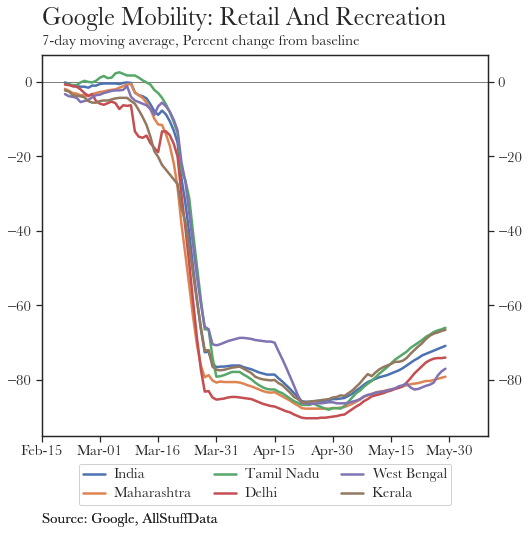

In [190]:
df1 = df_.copy()
df1= df1[['sub_region_1', 'date','retail_and_recreation_percent_change_from_baseline']]
df1 = df1.pivot_table(index='date', columns='sub_region_1',values='retail_and_recreation_percent_change_from_baseline')
df1.columns.name = None
df1 = df1.rolling(7).mean()
df1 = df1.dropna()
df1 = df1[desired_region]

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Google Mobility: Retail And Recreation', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"7-day moving average, Percent change from baseline",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Google, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/thursday_01.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [191]:
xls_path = "/Users/gopal/Desktop/AllStuffData/Django_Local/mysite/dailycharts/06-01/Global_Mobility_Report.csv"
df = pd.read_csv(xls_path)
df = df[df['country_region'] == 'India']
df.sub_region_1 = df.sub_region_1.fillna('India')
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.to_period(freq='D')
desired_columns = ['sub_region_1', 'date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
# print(list(df.sub_region_1.unique()))
# desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','Gujarat','Rajasthan','Uttar Pradesh','Madhya Pradesh','West Bengal','Kerala']
desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','West Bengal','Kerala']
df = df[ df.sub_region_1.isin(desired_region)]
df= df[desired_columns]
df_ = df.copy()

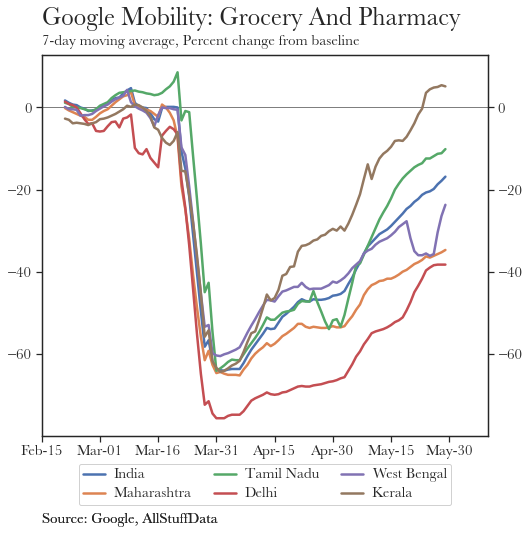

In [192]:
df1 = df_
df1= df1[['sub_region_1', 'date','grocery_and_pharmacy_percent_change_from_baseline']]
df1 = df1.pivot_table(index='date', columns='sub_region_1',values='grocery_and_pharmacy_percent_change_from_baseline')
df1.columns.name = None
df1 = df1.rolling(7).mean()
df1 = df1.dropna()
df1 = df1[desired_region]

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Google Mobility: Grocery And Pharmacy', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"7-day moving average, Percent change from baseline",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Google, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/thursday_02.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [193]:
xls_path = "/Users/gopal/Desktop/AllStuffData/Django_Local/mysite/dailycharts/06-01/Global_Mobility_Report.csv"
df = pd.read_csv(xls_path)
df = df[df['country_region'] == 'India']
df.sub_region_1 = df.sub_region_1.fillna('India')
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.to_period(freq='D')
desired_columns = ['sub_region_1', 'date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
# print(list(df.sub_region_1.unique()))
# desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','Gujarat','Rajasthan','Uttar Pradesh','Madhya Pradesh','West Bengal','Kerala']
desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','West Bengal','Kerala']
df = df[ df.sub_region_1.isin(desired_region)]
df= df[desired_columns]
df_ = df.copy()

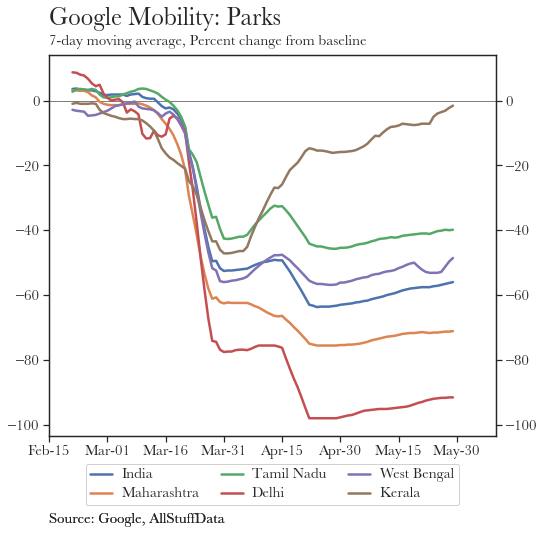

In [194]:
df1 = df_
df1= df1[['sub_region_1', 'date','parks_percent_change_from_baseline']]
df1 = df1.pivot_table(index='date', columns='sub_region_1',values='parks_percent_change_from_baseline')
df1.columns.name = None
df1 = df1.rolling(7).mean()
df1 = df1.dropna()
df1 = df1[desired_region]

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Google Mobility: Parks', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"7-day moving average, Percent change from baseline",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Google, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/thursday_03.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [195]:
xls_path = "/Users/gopal/Desktop/AllStuffData/Django_Local/mysite/dailycharts/06-01/Global_Mobility_Report.csv"
df = pd.read_csv(xls_path)
df = df[df['country_region'] == 'India']
df.sub_region_1 = df.sub_region_1.fillna('India')
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.to_period(freq='D')
desired_columns = ['sub_region_1', 'date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
# print(list(df.sub_region_1.unique()))
# desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','Gujarat','Rajasthan','Uttar Pradesh','Madhya Pradesh','West Bengal','Kerala']
desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','West Bengal','Kerala']
df = df[ df.sub_region_1.isin(desired_region)]
df= df[desired_columns]
df_ = df.copy()

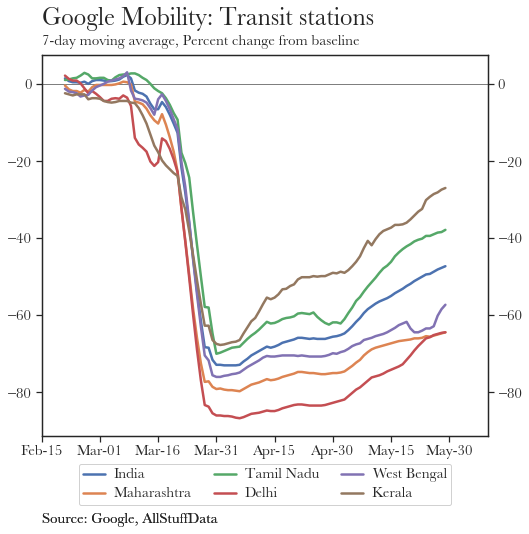

In [196]:
df1 = df_
df1= df1[['sub_region_1', 'date','transit_stations_percent_change_from_baseline']]
df1 = df1.pivot_table(index='date', columns='sub_region_1',values='transit_stations_percent_change_from_baseline')
df1.columns.name = None
df1 = df1.rolling(7).mean()
df1 = df1.dropna()
df1 = df1[desired_region]

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Google Mobility: Transit stations', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"7-day moving average, Percent change from baseline",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Google, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/thursday_04.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [197]:
xls_path = "/Users/gopal/Desktop/AllStuffData/Django_Local/mysite/dailycharts/06-01/Global_Mobility_Report.csv"
df = pd.read_csv(xls_path)
df = df[df['country_region'] == 'India']
df.sub_region_1 = df.sub_region_1.fillna('India')
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.to_period(freq='D')
desired_columns = ['sub_region_1', 'date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
# print(list(df.sub_region_1.unique()))
# desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','Gujarat','Rajasthan','Uttar Pradesh','Madhya Pradesh','West Bengal','Kerala']
desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','West Bengal','Kerala']
df = df[ df.sub_region_1.isin(desired_region)]
df= df[desired_columns]
df_ = df.copy()

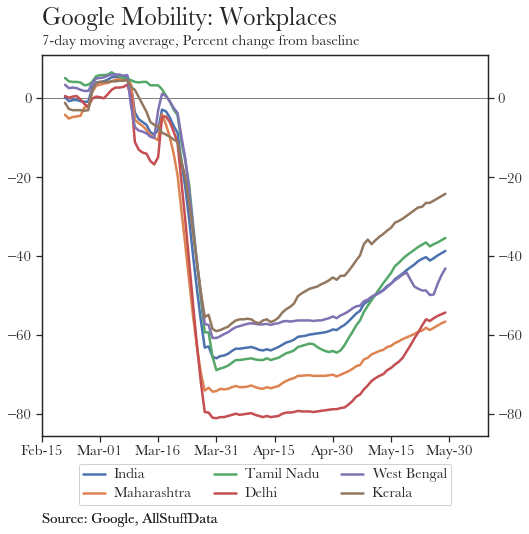

In [198]:
df1 = df_
df1= df1[['sub_region_1', 'date','workplaces_percent_change_from_baseline']]
df1 = df1.pivot_table(index='date', columns='sub_region_1',values='workplaces_percent_change_from_baseline')
df1.columns.name = None
df1 = df1.rolling(7).mean()
df1 = df1.dropna()
df1 = df1[desired_region]

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Google Mobility: Workplaces', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"7-day moving average, Percent change from baseline",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Google, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/thursday_05.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [199]:
xls_path = "/Users/gopal/Desktop/AllStuffData/Django_Local/mysite/dailycharts/06-01/Global_Mobility_Report.csv"
df = pd.read_csv(xls_path)
df = df[df['country_region'] == 'India']
df.sub_region_1 = df.sub_region_1.fillna('India')
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.to_period(freq='D')
desired_columns = ['sub_region_1', 'date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
# print(list(df.sub_region_1.unique()))
# desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','Gujarat','Rajasthan','Uttar Pradesh','Madhya Pradesh','West Bengal','Kerala']
desired_region = ['India', 'Maharashtra','Tamil Nadu','Delhi','West Bengal','Kerala']
df = df[ df.sub_region_1.isin(desired_region)]
df= df[desired_columns]
df_ = df.copy()

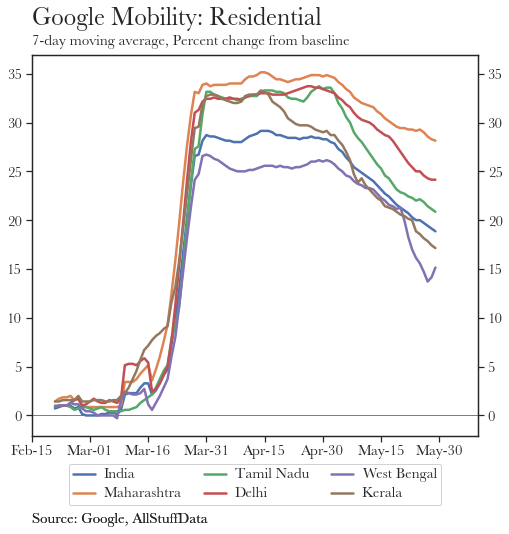

In [200]:
df1 = df_
df1= df1[['sub_region_1', 'date','residential_percent_change_from_baseline']]
df1 = df1.pivot_table(index='date', columns='sub_region_1',values='residential_percent_change_from_baseline')
df1.columns.name = None
df1 = df1.rolling(7).mean()
df1 = df1.dropna()
df1 = df1[desired_region]

fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Google Mobility: Residential', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"7-day moving average, Percent change from baseline",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Google, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-01/thursday_06.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)